## Importing Dependenices

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import cv2
import tensorflow as tf
from keras.models import load_model

In [2]:
img_path = 'characters/'
os.listdir(img_path)
# len(os.listdir(img_path))

['.ipynb_checkpoints',
 'char2.jpeg',
 'char3.jpeg',
 'char4.jpeg',
 'char5.jpeg',
 'char6.jpeg',
 'char7.jpeg',
 'char8.jpeg']

## Loading Model

In [3]:
model = load_model('../Tamil-NN/model2.h5')

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 156)                 │          40,092 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,099,710 (4.20 MB)

 Trainable params: 1,099,708 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Predicting Function

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image

def predict_image(filename, model, tamil_dict):
    img = cv2.imread(filename)
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    inv_thresh = cv2.bitwise_not(thresh)
    inverted=255-inv_thresh
    
    plt.figure(figsize=(1,1))
    plt.imshow(inverted, cmap='gray')
    plt.show()
    
    masked_img_resized = cv2.resize(inverted, (64, 64))
    masked_img_resized = cv2.cvtColor(masked_img_resized, cv2.COLOR_GRAY2RGB)
    # plt.imshow(masked_img_resized)
    img_array = np.expand_dims(masked_img_resized, axis=0)
    prediction = model.predict(img_array)
    index = np.argmax(prediction)
    print("Predicted class:", tamil_dict[index])

    return tamil_dict[index]

In [6]:
tamil_dict={0: 'ா', 1: 'அ', 2: 'ஆ', 3: 'இ', 4: 'ஈ', 5: 'உ', 6: 'ஊ', 7: 'எ', 8: 'ஏ', 9: 'ஐ', 10: 'ஒ', 11: 'ஓ', 12: 'ஔ', 13: 'ஃ', 14: 'க்', 
15: 'க', 16: 'கி', 17: 'கீ', 18: 'கு', 19: 'கூ', 20: 'ச்', 21: 'ச', 22: 'சி', 23: 'சீ', 24: 'சு', 25: 'சூ', 26: 'ங்', 27: 'ங', 28: 'ஙி', 29: 'ஙீ', 30: 'ஙு', 
31: 'ஙூ', 32: 'ஞ்', 33: 'ஞ', 34: 'ஞி', 35: 'ஞீ', 36: 'ஞு', 37: 'ஞூ', 38: 'ட்', 39: 'ட', 40: 'ழ',41: 'டீ', 42: 'டு', 43: 'டூ', 44: 'ண்', 45: 'ண', 
46: 'ணி', 47: 'ணீ', 48: 'ணு', 49: 'ணூ', 50: 'த்', 51: 'த', 52: 'தி', 53: 'தீ', 54: 'து', 55: 'தூ', 56: 'ந்', 57: 'ந', 58: 'நி', 59: 'நீ', 60: 'நு',
61: 'நூ', 62: 'ப்', 63: 'ப', 64: 'பி', 65: 'பீ', 66: 'பு', 67: 'பூ', 68: 'ம்', 69: 'ம', 70: 'மி', 71: 'மீ', 72: 'மு', 73: 'மூ', 74: 'ய்', 75: 'ய', 
76: 'யி', 77: 'யீ',78: 'யு', 79: 'யூ', 80: 'ர்', 81: 'ர', 82: 'ரி', 83: 'ரீ', 84: 'ரு', 85: 'ரூ', 86: 'ல்', 87: 'ல', 88: 'லி', 89: 'லீ', 90: 'லு', 
91: 'லூ', 92: 'ன்', 93: 'ன', 94: 'னி', 95: 'னீ', 96: 'ளு', 97: 'ளூ', 98: 'ற்', 99: 'ற', 100: 'றி', 101: 'றீ', 102: 'று', 103: 'றூ', 104: 'வ்', 
105: 'வ', 106: 'வி', 107: 'வீ', 108: 'வு', 109: 'வூ', 110: 'ழ்', 111: 'ழ', 112: 'ழி', 113: 'ழீ', 114: 'ழு', 115: 'ழூ', 116: 'ன்', 117: 'ன', 118: 'னி',
119: 'னீ', 120: 'னு',121: 'ஷி', 122: 'ஷீ', 123: 'ஷு', 124: 'ஷூ', 125: 'க்ஷ', 126: 'க்ஷ்', 127: ' க்ஷி', 128: ' க்ஷீ', 129: 'ஜு', 130: 'ஜூ', 
131: 'ஹ', 132: 'ஹ்', 133: 'ஹி', 134: 'ஹீ', 135: 'ஹு', 136: 'ஹூ', 137: 'ஸ', 138: 'ஸ்', 139: 'ஸி', 140: 'ஸீ', 141: 'ஸு', 142: 'ஸூ', 
143: 'ஷ', 144: 'ஷ்', 145: 'னூ', 146: 'ஶ்ரீ', 147: 'க்ஷூ', 148: 'ஜ', 149: 'ஜ்', 150: 'ஜி', 151: 'ஜீ', 152: 'க்ஷீ', 153: 'ெ', 154: 'ே', 155: 'ை'}

## Predicting Word

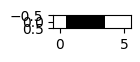

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: ச


'ச'

In [7]:
img = '../joshua/characters/char3.jpeg'
predict_image(img,model, tamil_dict)

In [8]:
os.listdir('../joshua/characters/')[1:]

['char2.jpeg',
 'char3.jpeg',
 'char4.jpeg',
 'char5.jpeg',
 'char6.jpeg',
 'char7.jpeg',
 'char8.jpeg']

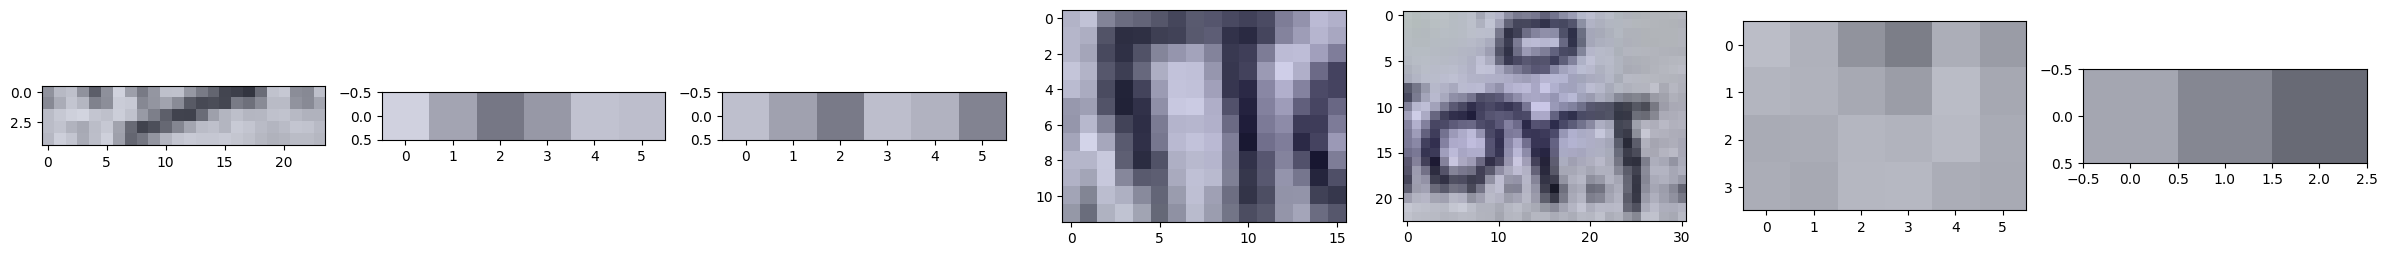

In [9]:
img_array = [cv2.imread(os.path.join('../joshua/characters/',img)) for img in os.listdir('../joshua/characters/')[1:]]
# print(img_array)
plt.figure(figsize=(30,30))
for i in np.arange(len(img_array)):
    try:
        plt.subplot(7, 7, i+1)
        plt.imshow(img_array[i])
    except:
        pass
plt.show()

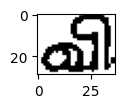

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: வி


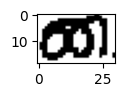

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: யி


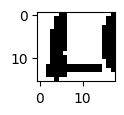

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: ப


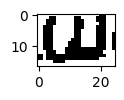

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: ய


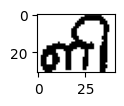

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: னி
<generator object <genexpr> at 0x0000023C17E78040>


In [13]:
word=[]
for img in os.listdir('../joshua/characters/')[1:]:
    img1 = os.path.join('../joshua/characters/',img)
    # plt.subplot()
    # plt.imshow(cv2.imread(img)
    word.append(predict_image(img1, model, tamil_dict))
print(i for i in word)

## Printing Word

In [14]:
for char in word:
    print(char, end='')

வியிபயனி

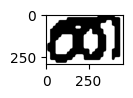

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: ன


'ன'

In [18]:
img = ('characters/test.jpg')
predict_image(img, model, tamil_dict)